In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import sys,os
sys.path.append(os.path.realpath('../..'))
from core.data import pretraining_records, clf_records, from_generator

%load_ext autoreload
%autoreload 2

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"]})
# # for Palatino and other serif fonts use:
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "serif",
#     "font.serif": ["Palatino"],
# })

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# ASTROMER input format

In [14]:
dataset = pretraining_records('../../data/records/ogle_20/train', 128, shuffle=True,
                              msk_frac=0.5, rnd_frac=0.2, same_frac=0.2,
                              max_obs=200)

[INFO] Shuffling


In [17]:
for batch in dataset:
#     print(batch['mask_in'][batch['length'] < 200][0][...,0])
#     print(batch['mask_out'][batch['length'] < 200][0][...,0])
    print(batch['length'][batch['length'] < 200])


tf.Tensor(
[ 45. 100. 148. 162. 186. 152. 129.  83.  41. 113.  77.  17. 167. 181.
  74. 102.  37.  44.  34. 152. 172.  46. 137. 179.  89.  28.  20.], shape=(27,), dtype=float32)
tf.Tensor(
[165. 132.  33. 175. 132. 166. 130. 159.  60. 174.  27.  45. 166.  17.
 100. 128. 150. 130.  26. 159. 164.  71.  73. 197.  95. 157.  13. 113.
 102.  16. 159. 112.], shape=(32,), dtype=float32)
tf.Tensor(
[ 48.   6.  47.  19. 156. 161.   4. 100. 104.  42.  98.   9.  83.  87.
  95.  99. 102. 158.  60.  92. 154. 153. 106. 175.   7.  34. 110. 139.
 110.  18.  23. 140. 108.], shape=(33,), dtype=float32)
tf.Tensor(
[100.  71.  35.  96. 186. 100. 169. 162.  93.  35. 150.  42.  47.  84.
 153.  81. 153. 171. 151. 115.  19.  92. 182. 100. 131.  42. 159.   4.
  44.], shape=(29,), dtype=float32)
tf.Tensor([ 34. 100.  97.], shape=(3,), dtype=float32)


2021-11-08 13:09:54.118582: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


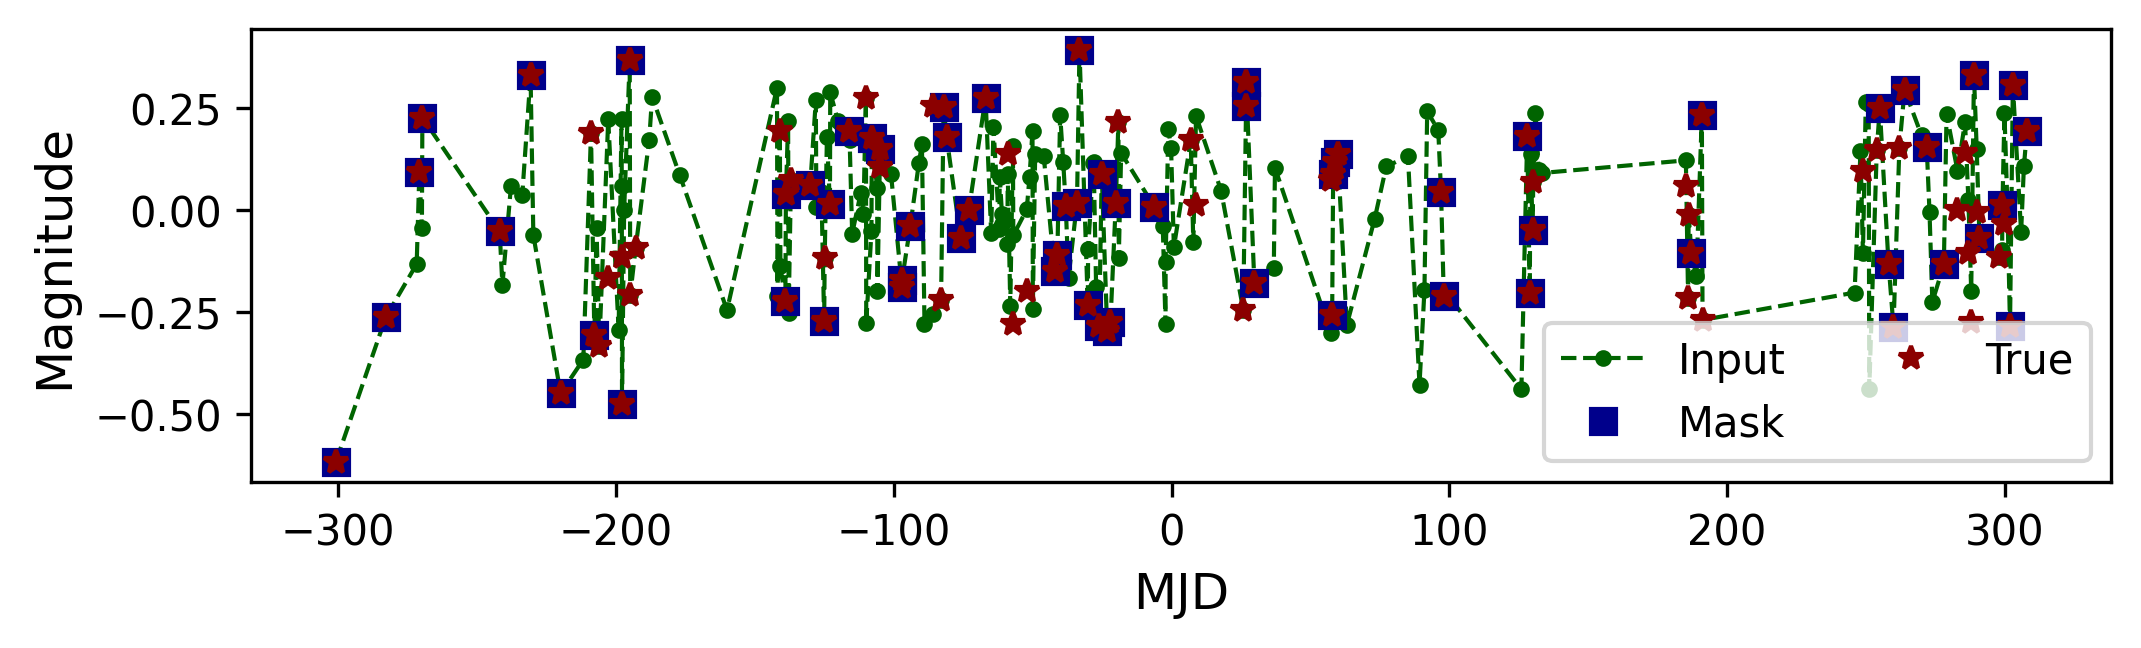

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(8,2), sharex=True, sharey=True, 
                         gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, dpi=300)
for batch in dataset:

    x_input  = batch['input'][-1]
    x_output = batch['output'][-1]
    t_sample = batch['times'][-1]
    
    mask_in  = tf.squeeze(batch['mask_in'][-1])
    mask_out = tf.squeeze(batch['mask_out'][-1])
    

    times_masked = tf.boolean_mask(t_sample, mask_in)
    serie_masked = tf.boolean_mask(x_input, mask_in)
    

    times_masked_out = tf.boolean_mask(t_sample, mask_out)
    serie_masked_out = tf.boolean_mask(x_input, mask_out)
        
    axes.plot(t_sample, x_output, color='darkgreen', linestyle='--', marker='.', label='Input', linewidth=1)
    axes.plot(times_masked, serie_masked, marker='s', linestyle='', color='darkblue', label='Mask', linewidth=1)
    axes.plot(times_masked_out, serie_masked_out, color='darkred', linestyle='', marker='*', label='True', linewidth=1)

    axes.set_xlabel('MJD', fontsize=12)
    axes.set_ylabel('Magnitude', fontsize=12)    
    axes.legend(ncol=2, fontsize=10)#bbox_to_anchor=(0.1, 1.2), ncol=4)
    break
# fig.savefig('presentation/figures/input.png', transparent=True)
# fig.savefig('presentation/figures/input.pdf', format='pdf', bbox_inches='tight')

In [5]:
# fig.savefig('./presentation/figures/input.pdf', bbox_inches='tight', format='pdf')

# Classification input 

In [34]:
import tensorflow as tf 
import os, sys

sys.path.append(os.path.realpath('../..'))

from core.data import clf_records

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
dataset = clf_records('../../data/records/alcock/train', 128, max_obs=200, take=-1)

[INFO] No shuffle No Oversampling


In [38]:
for batch in dataset:
    
    print(batch['mask_in'])
    break

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 1.]], shape=(128, 200), dtype=float32)


2021-11-08 13:24:31.557383: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [7]:
df_labels = pd.read_csv('./data/records/alcock/objects.csv')
class_names = df_labels['label'].values
class_names = [x.replace('_', '\_') for x in class_names]

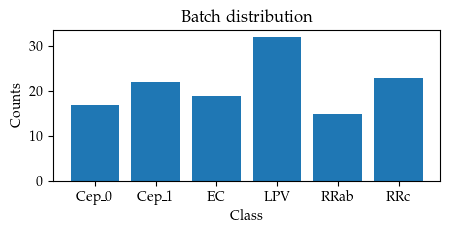

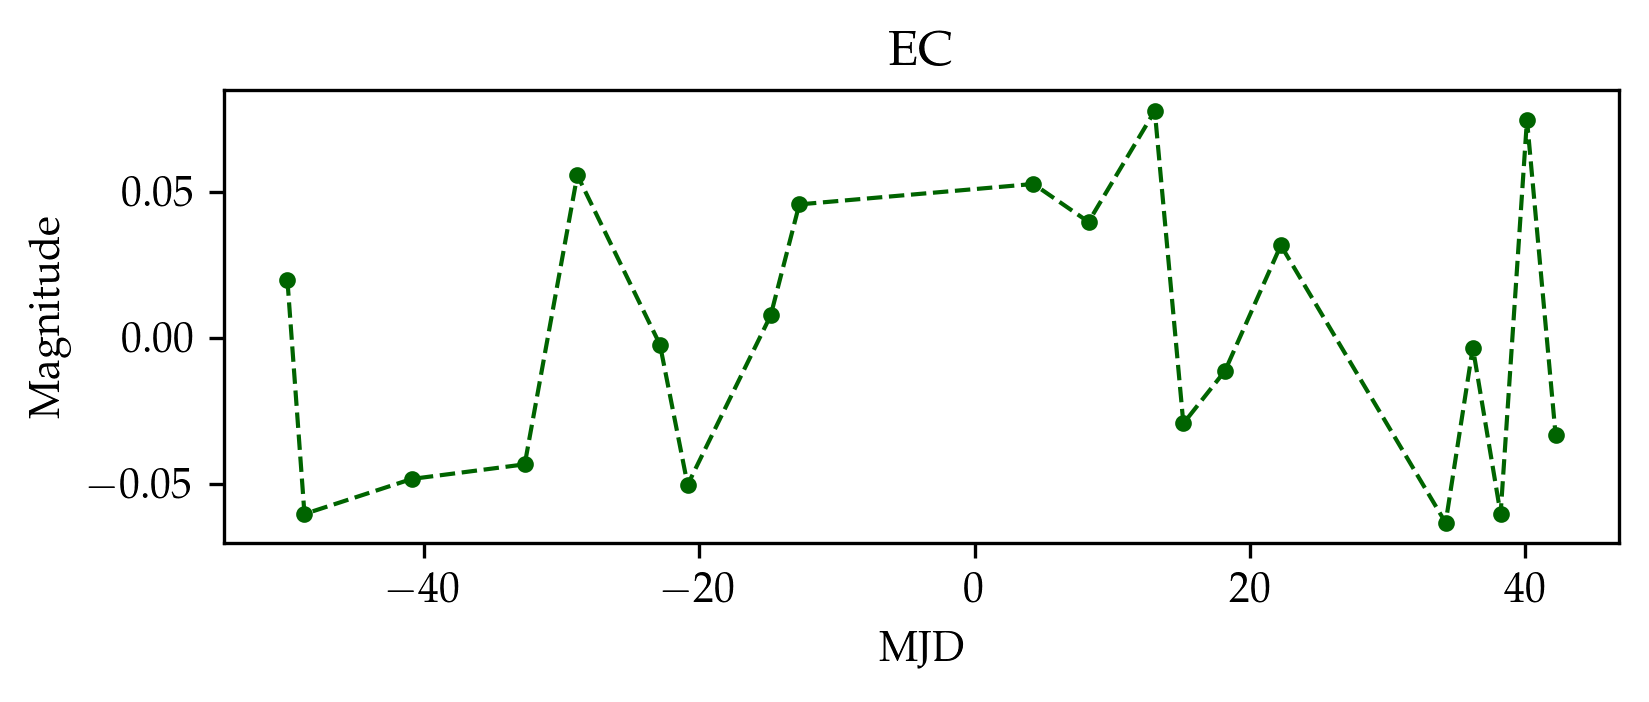

In [8]:
for batch in dataset:
    y_label  = batch['label'][-1]
    x_input  = batch['input'][-1]
    t_sample = batch['times'][-1]
    
    mask_in  = tf.squeeze(batch['mask_in'][-1])
    mask_out = tf.squeeze(batch['mask_out'][-1])

    times_masked = tf.boolean_mask(t_sample, mask_in)
    serie_masked = tf.boolean_mask(x_input, mask_in)
    
    # BATCH DISTRIBUTION
    plt.figure(figsize=(5,2), dpi=100)
    batch_labels = batch['label'].numpy()
    uniques, counts = np.unique(batch_labels, return_counts=True)
    x = range(len(uniques))
    plt.bar(x, counts)
    plt.xticks(x, class_names[:len(uniques)])
    plt.title('Batch distribution')
    plt.xlabel('Class')
    plt.ylabel('Counts')
    plt.show()
    
    # Lightcurve
    fig, axes = plt.subplots(1, 1, figsize=(6,2), sharex=True, sharey=True, 
                             gridspec_kw={'hspace': 0.3, 'wspace': 0.2}, dpi=300)
    axes.plot(t_sample, x_input, color='darkgreen', linestyle='--', marker='.', label='Input', linewidth=1)
    axes.set_title('{}'.format(str(class_names[y_label])))
    axes.set_xlabel('MJD')
    axes.set_ylabel('Magnitude')   
    fig.savefig('presentation/figures/raw_input.png', transparent=True)
    plt.show()
    break